# <font color='orange'> Military Powers of Countries

## <font color='orange'> Requirements

In [103]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

## <font color='orange'> Import Data

In [105]:
df=pd.read_excel("World military power.xlsx",header=1)

In [106]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


## <font color='orange'> EDA (Exploratory Data Analysis)

In [108]:
df.tail()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
133,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267.0
134,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616.0
135,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601.0
136,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043.0
137,Zimbabwe,1.7577,Zimbabwe,90,Zimbabwe,10,Zimbabwe,0,Zimbabwe,14,...,Zimbabwe,"1,40,30,368",Zimbabwe,"3,90,757",NaN,NaN,Zimbabwe,0,Zimbabwe,3229.0


In [109]:
df.shape

(138, 60)

In [110]:
df.sample(3)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
86,Nigeria,0.6485,Nigeria,129,Nigeria,8,Nigeria,13,Nigeria,21,...,Nigeria,"20,34,52,505",Nigeria,"9,23,768",Nigeria,853,Nigeria,8600,Nigeria,4477.0
5,Armenia,2.1251,Armenia,64,Armenia,0,Armenia,9,Armenia,3,...,Armenia,"30,38,217",Armenia,29743,NaN,NaN,Armenia,0,Armenia,1570.0
90,Oman,1.2514,Oman,131,Oman,29,Oman,10,Oman,9,...,Oman,"34,94,116",Oman,"3,09,500",Oman,2092,Oman,0,Oman,1561.0


In [111]:
df.shape

(138, 60)

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716,1.324018,0.0606,0.5748,1.0341,2.021525,10.1681
Aircraft Strength value,138.0,388.471014,1231.981859,0.0000,33.0000,111.0000,290.250000,13264.0000
Fighter/Interceptor Strength value,138.0,81.565217,230.324777,0.0000,0.0000,17.0000,60.500000,2085.0000
Attack Aircraft Strength value,138.0,25.760870,94.528222,0.0000,0.0000,0.0000,15.750000,742.0000
Transport Aircraft Fleet Strength value,138.0,30.231884,92.330436,0.0000,3.0000,9.0000,26.000000,945.0000
Trainer Aircraft Fleet value,138.0,82.833333,240.803721,0.0000,4.2500,26.0000,79.250000,2643.0000
Helicopter Fleet Strength value,138.0,154.065217,520.183631,0.0000,15.2500,44.0000,126.750000,5768.0000
Attack Helicopter Fleet Strength value,138.0,25.623188,97.326091,0.0000,0.0000,2.0000,17.750000,967.0000
Tank Strength value,138.0,646.565217,1515.463683,0.0000,19.2500,153.0000,436.250000,12950.0000
AFV/APC Strength value,138.0,2485.695652,5410.546392,0.0000,250.2500,734.5000,2000.000000,39253.0000


In [113]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [115]:
df[df['Military Strength']=='Turkey']

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
124,Turkey,0.2098,Turkey,1055,Turkey,206,Turkey,0,Turkey,80,...,Turkey,"8,12,57,239",Turkey,"7,83,562",Turkey,7200,Turkey,1200,Turkey,2816.0


## <font color='orange'> Feature Engineering

In [117]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [118]:
#df.drop(columns = df.iloc[:,1:60:2], inplace = True)
df.drop(columns=['Aircraft Strength','Fighter/Interceptor Strength','Attack Aircraft Strength','Transport Aircraft Fleet Strength','Trainer Aircraft Fleet'
                    ,'Helicopter Fleet Strength','Attack Helicopter Fleet Strength','Tank Strength','AFV/APC Strength','Self-Propelled Artillery Strength',
                    'Towed Artillery Strength','Rocket Projector Strength','Navy Fleet Strengths','Aircraft Carrier Fleet Strength','Submarine Fleet Strength',
                     'Destroyer Fleet Strength','Frigate Fleet Strength','defense spending budget','External Debt','Airport Totals','Oil Production','Oil Consumption',
                     'Proven Oil Reserves','Available Manpower','Total Population','Total Square Land Area','Total Coastline Coverage','Total Waterway Coverage',
                     'Total Border Coverage'],inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [120]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [121]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [122]:
df.fillna(0,inplace=True)

In [123]:
df.isnull().sum()

Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

In [124]:
df.tail()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
133,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267.0
134,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616.0
135,Yemen,1.2412,169,77,0,8,21,61,14,620,...,57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.0
136,Zambia,1.6464,108,18,0,11,52,27,0,75,...,88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",0,2250,6043.0
137,Zimbabwe,1.7577,90,10,0,14,38,28,6,42,...,196,0,19500,0,"55,84,086","1,40,30,368","3,90,757",0,0,3229.0


In [125]:
for col in df.select_dtypes('object').columns[1:]: # we're starting from second column since we do not want to change 'Military Strength' columns
    df[col]=df[col].astype('str')
    df[col]=df.select_dtypes('object')[col].str.replace(',','') # removes commas to prepare the data for numerical conversion
    df[col]=df[col].astype('float')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## <font color='orange'> Data Visualization

<Axes: >

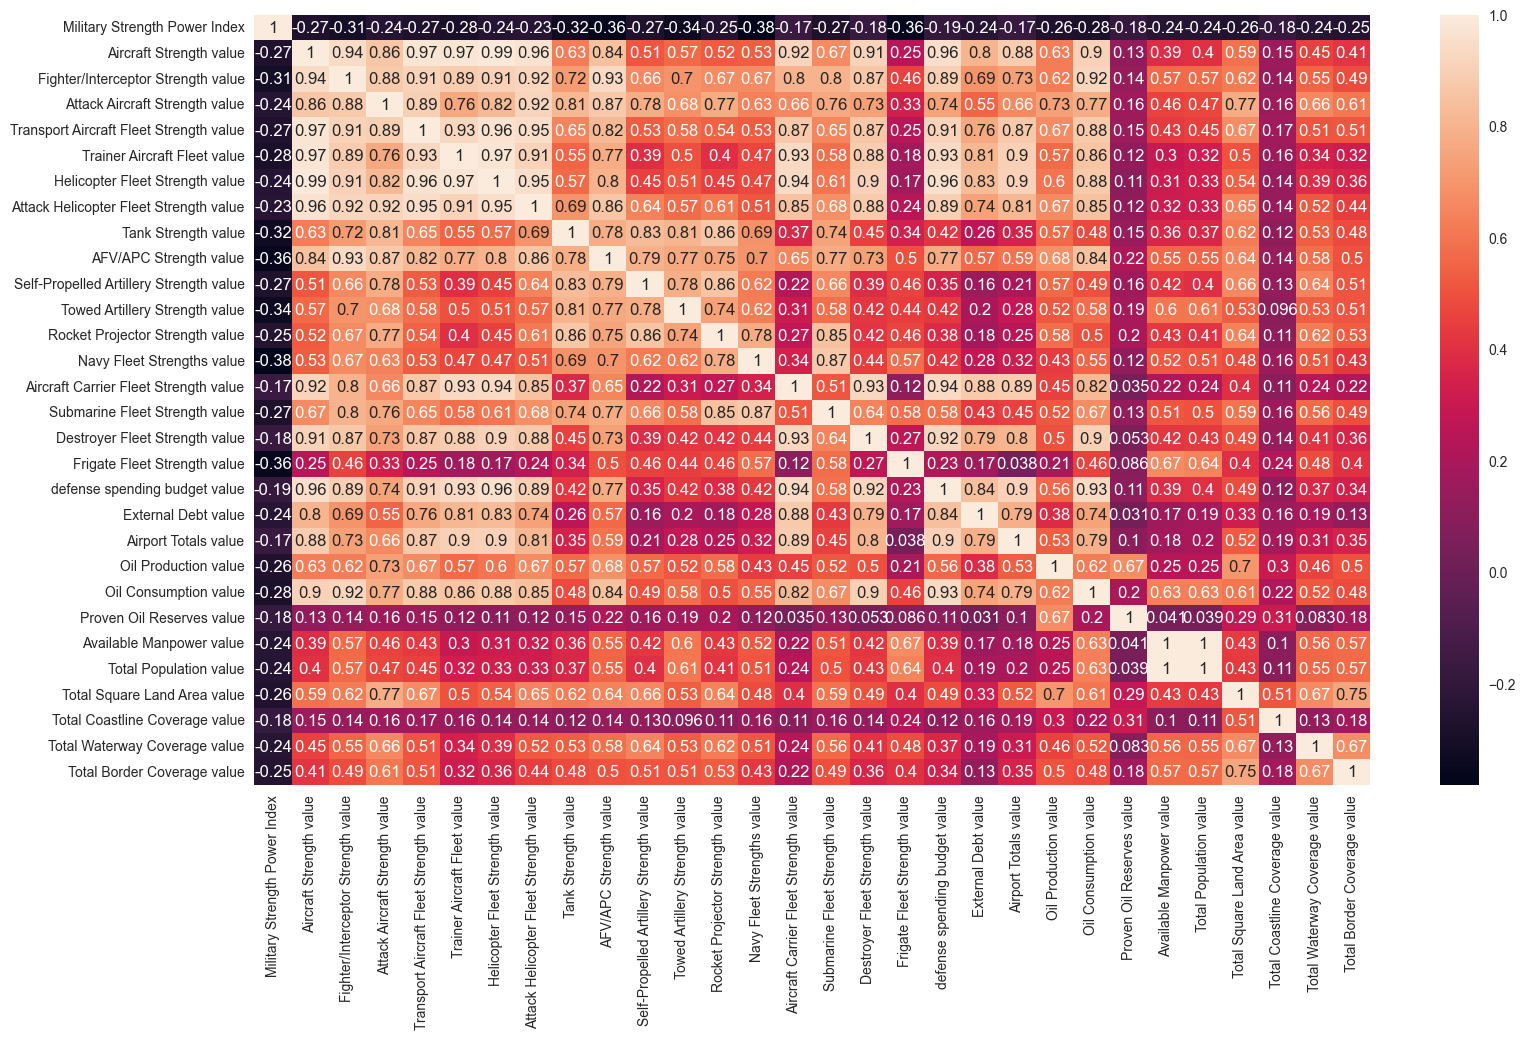

In [128]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## <font color='orange'> Modelling

In [130]:
x=df.drop(['Military Strength'],axis=1)

In [131]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,1.3444,260,0,25,30,0,187,0,0,1062,...,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19,0,0,0,0,19,0,0,467,...,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295,72,18,30,47,126,15,379,595,...,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227,24,7,9,64,100,0,370,739,...,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [132]:
x.isnull().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

In [133]:
model=KMeans(n_clusters=4)

In [134]:
model=model.fit(x)

In [135]:
predictions=model.predict(x)

In [136]:
predictions

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [137]:
silhouette_score(x,predictions)

0.8622957254997137

In [138]:
x.shape

(138, 30)

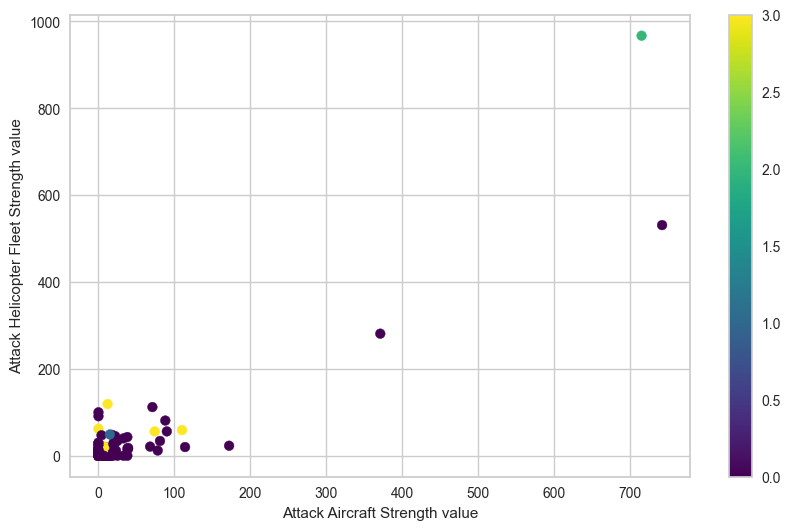

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(x['Attack Aircraft Strength value'],x['Attack Helicopter Fleet Strength value'],c=predictions,cmap='viridis')
plt.xlabel('Attack Aircraft Strength value')
plt.ylabel('Attack Helicopter Fleet Strength value')
plt.colorbar() # hover getirmek

In [140]:
x['cluster']=predictions

In [174]:
x.head(20)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,1.3444,260,0,25,30,0,187,0,0,1062,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
1,2.3137,19,0,0,0,0,19,0,0,467,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
2,0.4659,551,103,22,59,87,257,45,880,7361,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
3,0.8379,295,72,18,30,47,126,15,379,595,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
4,0.6521,227,24,7,9,64,100,0,370,739,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0
5,2.1251,64,0,9,3,13,37,20,110,748,...,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,29743.0,0.0,0.0,1570.0,0
6,0.3225,464,82,6,38,174,133,22,59,3051,...,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,7741220.0,25760.0,2000.0,0.0,3
7,0.9568,120,15,0,11,32,62,0,56,467,...,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,83871.0,0.0,0.0,2524.0,0
8,0.9463,147,17,12,1,29,88,17,570,1451,...,789300.0,180000.0,7.000000e+09,5042346.0,10046516.0,86600.0,713.0,0.0,2468.0,0
9,1.8547,109,17,0,2,37,65,22,180,843,...,45000.0,55000.0,1.246000e+08,806505.0,1422659.0,760.0,161.0,0.0,0.0,0


In [180]:
wcss=[] # within cluster sum of square
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(f"Number of cluster {i}, silhouette {ss1}")
    wcss.append(model.inertia_)

Number of cluster 2, silhouette 0.9493996936226436
Number of cluster 3, silhouette 0.8995442950361631
Number of cluster 4, silhouette 0.8671436271439987
Number of cluster 5, silhouette 0.8675195540746111
Number of cluster 6, silhouette 0.7789462745536555
Number of cluster 7, silhouette 0.7786850050674872
Number of cluster 8, silhouette 0.7847423623940264
Number of cluster 9, silhouette 0.7809562458841909


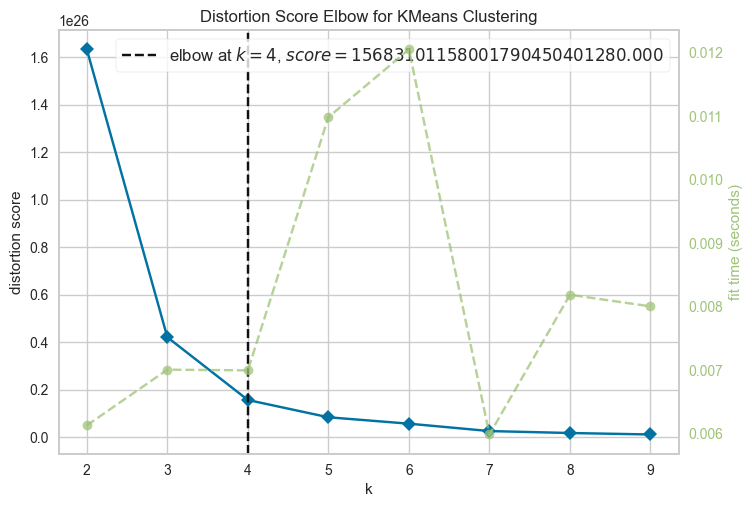

In [178]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10)) # we can see that the elbow is at k=4 and it should be 4 clusters
vis.fit(x)
vis.show();

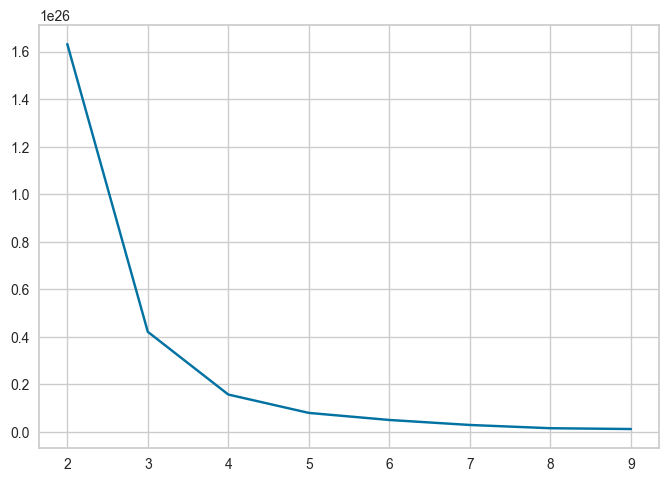

In [184]:
plt.plot(range(2,10),wcss); # elbow at k=4

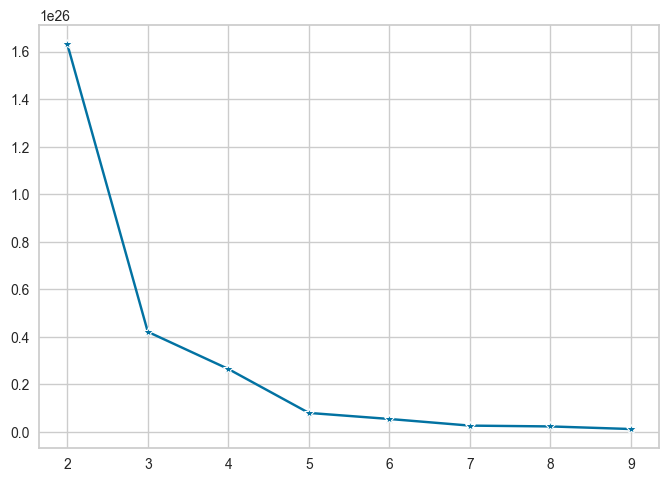

In [66]:
sns.lineplot(x=range(2,10),y=wcss,marker='*');

In [186]:
x.insert(0, 'Military Strengths', df['Military Strength'])

In [188]:
x.head()

,Military Strengths,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
1,Albania,2.3137,19,0,0,0,0,19,0,0,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
3,Angola,0.8379,295,72,18,30,47,126,15,379,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0


## <font color='orange'> World Map Visualizations

In [196]:
#pip install geopandas matplotlib

In [204]:
#pip install geodatasets

In [206]:
import geopandas as gpd
import geodatasets

In [216]:
world = gpd.read_file('ne_110m_admin_0_countries')

In [250]:
data={
    'Country':x['Military Strengths'],
    'cluster':x['cluster']
}
data=pd.DataFrame(data)
data.sample(5)

,Country,cluster
3,Angola,0
101,Russia,0
110,South Korea,0
42,Georgia,0
28,Croatia,0


In [258]:
world = world.merge(data, how="left", left_on="SOVEREIGNT", right_on="Country")

In [264]:
world['cluster'] = world['cluster'].fillna(-1)

In [292]:
cluster_colors = {0: 'lightpink', 1: 'green', 2: 'blue', 3: 'orange'}
world['color'] = world['cluster'].map(cluster_colors)
world['color'] = world['color'].fillna('lightgray')

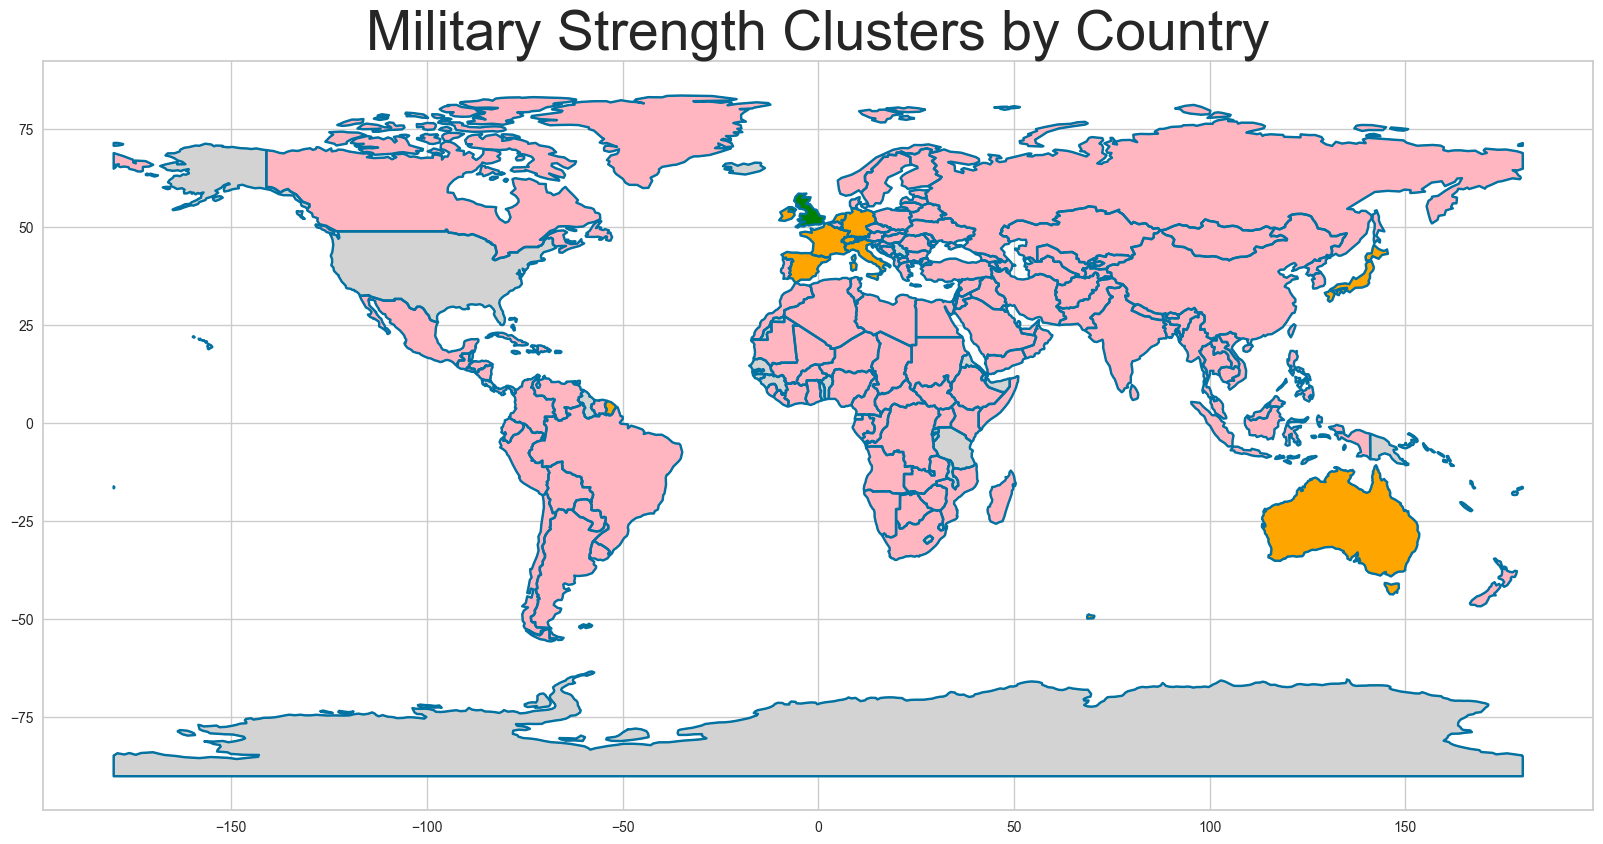

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.boundary.plot(ax=ax)  # Draw country borders
world.plot(column='color', color=world['color'], linewidth=0.8, edgecolor='k', ax=ax)
plt.title("Military Strength Clusters by Country",fontsize=40);